In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [73]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [75]:
df.loc[0, 'experience'] = 'zero'
df.loc[1, 'experience'] = 'one'
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,one,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [77]:
!pip install word2number
from word2number import w2n

In [78]:
df['experience'] = df['experience'].apply(w2n.word_to_num)
df['experience']

0     0
1     1
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [79]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,1,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [80]:
import math
df['test_score(out of 10)'] = df['test_score(out of 10)'].apply(math.floor)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8,9,50000
1,1,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,8,7,72000
7,11,7,8,80000


In [81]:
df.rename(columns = {'test_score(out of 10)': 'test_score', 'interview_score(out of 10)': 'interview_score', 'salary($)': 'salary'}, inplace = 1)
df

,experience,test_score,interview_score,salary
0,0,8,9,50000
1,1,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,8,7,72000
7,11,7,8,80000


In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['experience', 'test_score', 'interview_score']], df.salary)


LinearRegression()

In [83]:
model.coef_

array([2952.76492755, 1849.11614228, 2603.77439417])

In [84]:
model.intercept_

13538.758003737617

In [85]:
model.predict([[2,9,6]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51708.9795043])

In [86]:
model.predict([[12,10,10]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93500.8424987])

   experience  test_score  interview_score  salary  predicted_salary
0           0           8                9   50000      51765.656689
1           1           8                6   45000      46907.098434
2           5           6                7   60000      57623.700254
3           2          10               10   65000      63973.193223
4           7           9                6   70000      66472.804142
5           3           7               10   62000      61378.609724
6          10           8                7   72000      76085.757177
7          11           7                8   80000      79793.180356


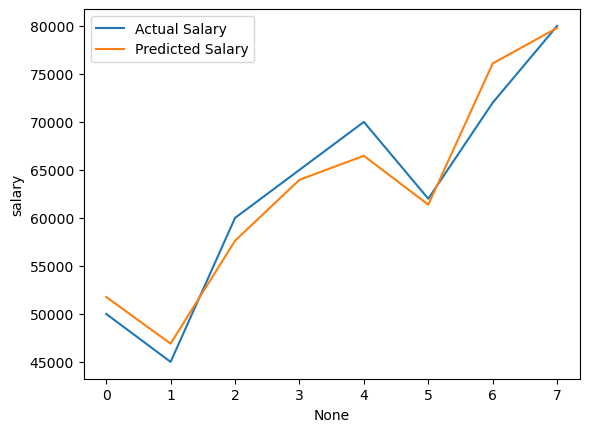

In [109]:
import seaborn as sns
df['predicted_salary'] = model.predict(df[['experience', 'test_score', 'interview_score']])
print(df)

# Plot actual vs predicted
sns.lineplot(x=df.index, y=df['salary'], label='Actual Salary')
sns.lineplot(x=df.index, y=df['predicted_salary'], label='Predicted Salary')
plt.legend()
plt.show()

In [188]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [190]:
dset = pd.read_csv('hiring.csv')
dset

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [192]:
dset.loc[0, 'experience'] = 'three'
dset.loc[1, 'experience'] = 'four'
dset

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,three,8.0,9,50000
1,four,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [194]:
dset.rename(columns = {'test_score(out of 10)': 'test_score', 'interview_score(out of 10)': 'interview_score', 	'salary($)': 'salary'}, inplace = 'true')
dset

,experience,test_score,interview_score,salary
0,three,8.0,9,50000
1,four,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [196]:
dset.test_score = dset.test_score.fillna(dset.test_score.median())
dset

,experience,test_score,interview_score,salary
0,three,8.0,9,50000
1,four,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [198]:
from word2number import w2n
dset['experience'] = dset['experience'].apply(w2n.word_to_num)
dset

,experience,test_score,interview_score,salary
0,3,8.0,9,50000
1,4,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [204]:
X = dset.drop('salary', axis = 1)
y = dset['salary']
X.shape,y.shape

((8, 3), (8,))

In [222]:
X_train, y_train, X_test, y_test = train_test_split(dset, train_size = 0.5, random_state = 42)


ValueError: not enough values to unpack (expected 4, got 2)